<a href="https://colab.research.google.com/github/prasath9944/ANN_ImPlementation/blob/main/fsds_21_ann_aps_sensor_fault_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [41]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
dataset=pd.read_csv('https://raw.githubusercontent.com/sunnysavita10/deep-learning/main/aps_data.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [44]:
dataset.shape

(5000, 171)

In [45]:
dataset.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [46]:
dataset=dataset.replace('na',np.nan)

In [47]:
dataset.isna().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [48]:
dataset.isna().sum().sum()

71649

In [49]:
pd.options.display.max_rows=171

In [50]:
dataset.isna().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
ae_000     224
af_000     224
ag_000      58
ag_001      58
ag_002      58
ag_003      58
ag_004      58
ag_005      58
ag_006      58
ag_007      58
ag_008      58
ag_009      58
ah_000      60
ai_000      56
aj_000      56
ak_000     384
al_000      65
am_0        56
an_000      65
ao_000      53
ap_000      65
aq_000      53
ar_000     242
as_000      56
at_000      56
au_000      56
av_000     224
ax_000     224
ay_000      58
ay_001      58
ay_002      58
ay_003      58
ay_004      58
ay_005      58
ay_006      58
ay_007      58
ay_008      58
ay_009      58
az_000      58
az_001      58
az_002      58
az_003      58
az_004      58
az_005      58
az_006      58
az_007      58
az_008      58
az_009      58
ba_000      61
ba_001      61
ba_002      61
ba_003      61
ba_004      61
ba_005      61
ba_006      61
ba_007      61
ba_008      61
ba_009      61
bb_000      60
bc_000     243
bd_000     243
be_000    

In [51]:
pd.DataFrame(dataset.isna().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Counts"})

,Null Value Counts
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
bo_000,3832
bn_000,3631
bm_000,3273
bl_000,2234
bk_000,1880


In [52]:
# Filling null values in features with medain of that features
for feature in [feature for feature in dataset.columns if feature not in ['class']]:
  dataset[feature]=dataset[feature].fillna(dataset[feature].median()) 

In [53]:
pd.options.display.max_rows=10

In [54]:
dataset.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [55]:
dataset.isna().sum().sum()

0

In [56]:
pd.DataFrame(dataset.isna().sum().sort_values(ascending=False)).rename(columns={0:"Null Value Counts"})

,Null Value Counts
class,0
cs_003,0
cn_009,0
co_000,0
cp_000,0
...,...
ba_005,0
ba_006,0
ba_007,0
ba_008,0


In [57]:
dataset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [58]:
X=dataset.drop('class',axis=1)
y=dataset['class']

In [59]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,6,0,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,90,0,0,66,0,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,30,0.0,16,14,0,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,444,0.0,14,12,0,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,82,0.0,12,10,0,0,0,0,1464,4980,...,1010,132,310,56,92,1292,0,0,0,0


In [60]:
y.head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

In [61]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [62]:
y=pd.get_dummies(y,drop_first=True)

In [63]:
#splitting the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [66]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [67]:
# importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [68]:
classifier=Sequential()

classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=170))

classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))

classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [69]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                1710      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [71]:
model_history=classifier.fit(X_train,y_train,batch_size=10,epochs=30,validation_split=0.25)

Epoch 1/30
300/300 [==============================] - 1s 3ms/step - loss: 0.2109 - accuracy: 0.9450 - val_loss: 0.0719 - val_accuracy: 0.9790
Epoch 2/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0547 - accuracy: 0.9853 - val_loss: 0.0569 - val_accuracy: 0.9810
Epoch 3/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0369 - accuracy: 0.9860 - val_loss: 0.0492 - val_accuracy: 0.9820
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9910 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 5/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0210 - accuracy: 0.9917 - val_loss: 0.0644 - val_accuracy: 0.9850
Epoch 6/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0192 - accuracy: 0.9930 - val_loss: 0.0667 - val_accuracy: 0.9840
Epoch 7/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.0603 - val_accuracy: 0.9880
Epoch 

In [72]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [73]:
model_history.history['accuracy']

[0.9449999928474426,
 0.9853333234786987,
 0.9860000014305115,
 0.9909999966621399,
 0.9916666746139526,
 0.9929999709129333,
 0.9940000176429749,
 0.9963333606719971,
 0.9963333606719971,
 0.9976666569709778,
 0.9976666569709778,
 0.9953333139419556,
 0.996999979019165,
 0.9963333606719971,
 0.9980000257492065,
 0.9976666569709778,
 0.9976666569709778,
 0.996666669845581,
 0.9983333349227905,
 0.9990000128746033,
 0.9990000128746033,
 0.9986666440963745,
 0.9973333477973938,
 0.9983333349227905,
 0.9993333220481873,
 0.9990000128746033,
 0.9983333349227905,
 0.9986666440963745,
 0.9986666440963745,
 0.9993333220481873]

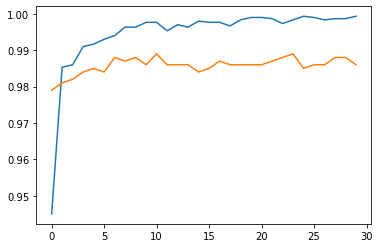

In [74]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

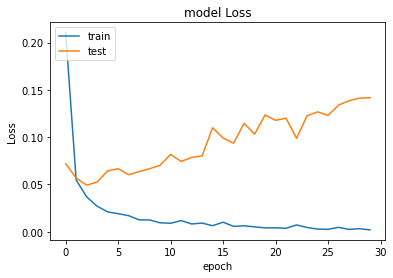

In [77]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

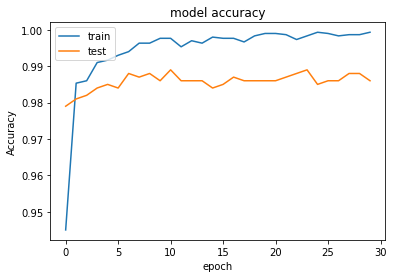

In [78]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [97]:
y_pred=classifier.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [98]:
y_pred=y_pred>0.05

In [99]:
y_test.shape

(1000, 1)

In [100]:
y_pred.shape

(1000, 1)

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
confusion_matrix(y_test,y_pred)

array([[971,  15],
       [  3,  11]])